In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 

style.use('ggplot')

In [32]:
class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations


	def fit(self, data):

		self.centroids = {}

		#inicializar los centroides, los primeros elementos 'k' en el conjunto de datos serán nuestros centroides iniciales
		for i in range(self.k):
			self.centroids[i] = data[i]

		#iniciar iteraciones
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			# Buscar la distancia entre el punto mas cercano y el cluster; eligio el punto mas cercano al cetroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.distances = classification;
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#promediar los puntos de datos del clúster para volver a calcular los centroides
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)


			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#salir del bucle principal si los resultados son óptimos, es decir. los centroides no cambian mucho sus posiciones (más que nuestra tolerancia)
			if isOptimal:
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification

Clase:  0
[7.  3.2 4.7 1.4]
[6.9 3.1 4.9 1.5]
[6.7 3.  5.  1.7]
[6.3 3.3 6.  2.5]
[7.1 3.  5.9 2.1]
[6.3 2.9 5.6 1.8]
[6.5 3.  5.8 2.2]
[7.6 3.  6.6 2.1]
[7.3 2.9 6.3 1.8]
[6.7 2.5 5.8 1.8]
[7.2 3.6 6.1 2.5]
[6.5 3.2 5.1 2. ]
[6.4 2.7 5.3 1.9]
[6.8 3.  5.5 2.1]
[6.4 3.2 5.3 2.3]
[6.5 3.  5.5 1.8]
[7.7 3.8 6.7 2.2]
[7.7 2.6 6.9 2.3]
[6.9 3.2 5.7 2.3]
[7.7 2.8 6.7 2. ]
[6.7 3.3 5.7 2.1]
[7.2 3.2 6.  1.8]
[6.4 2.8 5.6 2.1]
[7.2 3.  5.8 1.6]
[7.4 2.8 6.1 1.9]
[7.9 3.8 6.4 2. ]
[6.4 2.8 5.6 2.2]
[6.1 2.6 5.6 1.4]
[7.7 3.  6.1 2.3]
[6.3 3.4 5.6 2.4]
[6.4 3.1 5.5 1.8]
[6.9 3.1 5.4 2.1]
[6.7 3.1 5.6 2.4]
[6.9 3.1 5.1 2.3]
[6.8 3.2 5.9 2.3]
[6.7 3.3 5.7 2.5]
[6.7 3.  5.2 2.3]
[6.5 3.  5.2 2. ]
[6.2 3.4 5.4 2.3]
Clase:  1
[6.4 3.2 4.5 1.5]
[5.5 2.3 4.  1.3]
[6.5 2.8 4.6 1.5]
[5.7 2.8 4.5 1.3]
[6.3 3.3 4.7 1.6]
[4.9 2.4 3.3 1. ]
[6.6 2.9 4.6 1.3]
[5.2 2.7 3.9 1.4]
[5.  2.  3.5 1. ]
[5.9 3.  4.2 1.5]
[6.  2.2 4.  1. ]
[6.1 2.9 4.7 1.4]
[5.6 2.9 3.6 1.3]
[6.7 3.1 4.4 1.4]
[5.6 3.  4.5 1.5]
[5.8 2.7

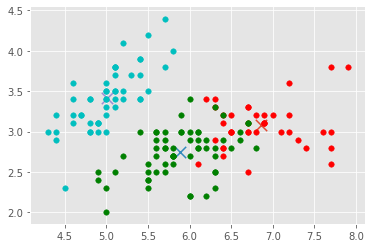

In [33]:
def main():
	df = pd.read_csv(r"data/iris.csv")
	df = df[['sepal_length','sepal_width','petal_length','petal_width']]
	dataset = df.astype(float).values.tolist()

	X = df.values #returns a numpy array
	
	km = K_Means(3)
    
	km.fit(X)

	# Plotting starts here
	colors = ["r", "g", "c", "b", "k"]


	for centroid in km.centroids:
		plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")
        
	for classification in km.classes:
		color = colors[classification]
		print("Clase: ", classification)
		for features in km.classes[classification]:
			print(features)
			plt.scatter(features[0], features[1], color = color,s = 30)
	
	plt.show()


if __name__ == "__main__":
	main()